In [1]:
import pandas as pd
import os
from src.utils.projekt_utils import get_project_root
from src.utils.name_utils import US_STATES_DIR

In [2]:
education_data = pd.read_csv(os.path.join(get_project_root(), 'data/processed/education_data.csv'), sep=';')
GDP_data = pd.read_csv(os.path.join(get_project_root(), 'data/processed/GDP_data.csv'), sep=';')
health_data = pd.read_csv(os.path.join(get_project_root(), 'data/processed/health_data.csv'), sep=';')
HPI_data = pd.read_csv(os.path.join(get_project_root(), 'data/processed/HPI_data.csv'), sep=';')
income_data = pd.read_csv(os.path.join(get_project_root(), 'data/processed/income_data.csv'), sep=';')
unemployment_data = pd.read_csv(os.path.join(get_project_root(), 'data/processed/unemployment_data.csv'), sep=';')


In [3]:
part1 = pd.merge(education_data, GDP_data, on='FIPS code')
part2 = pd.merge(part1, health_data, on='FIPS code')
part3 = pd.merge(part2, HPI_data, on='FIPS code')
part4 = pd.merge(part3, income_data, on='FIPS code')
part4 = pd.merge(part4, unemployment_data, on='FIPS code')

C:\Users\Filif\AppData\Local\Temp\ipykernel_6484\1306284521.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'State_x'} in the result is deprecated and will raise a MergeError in a future version.
  part4 = pd.merge(part3, income_data, on='FIPS code')


In [4]:
part4.shape

(2716, 598)

In [5]:
corr = part4.corr(numeric_only=True)

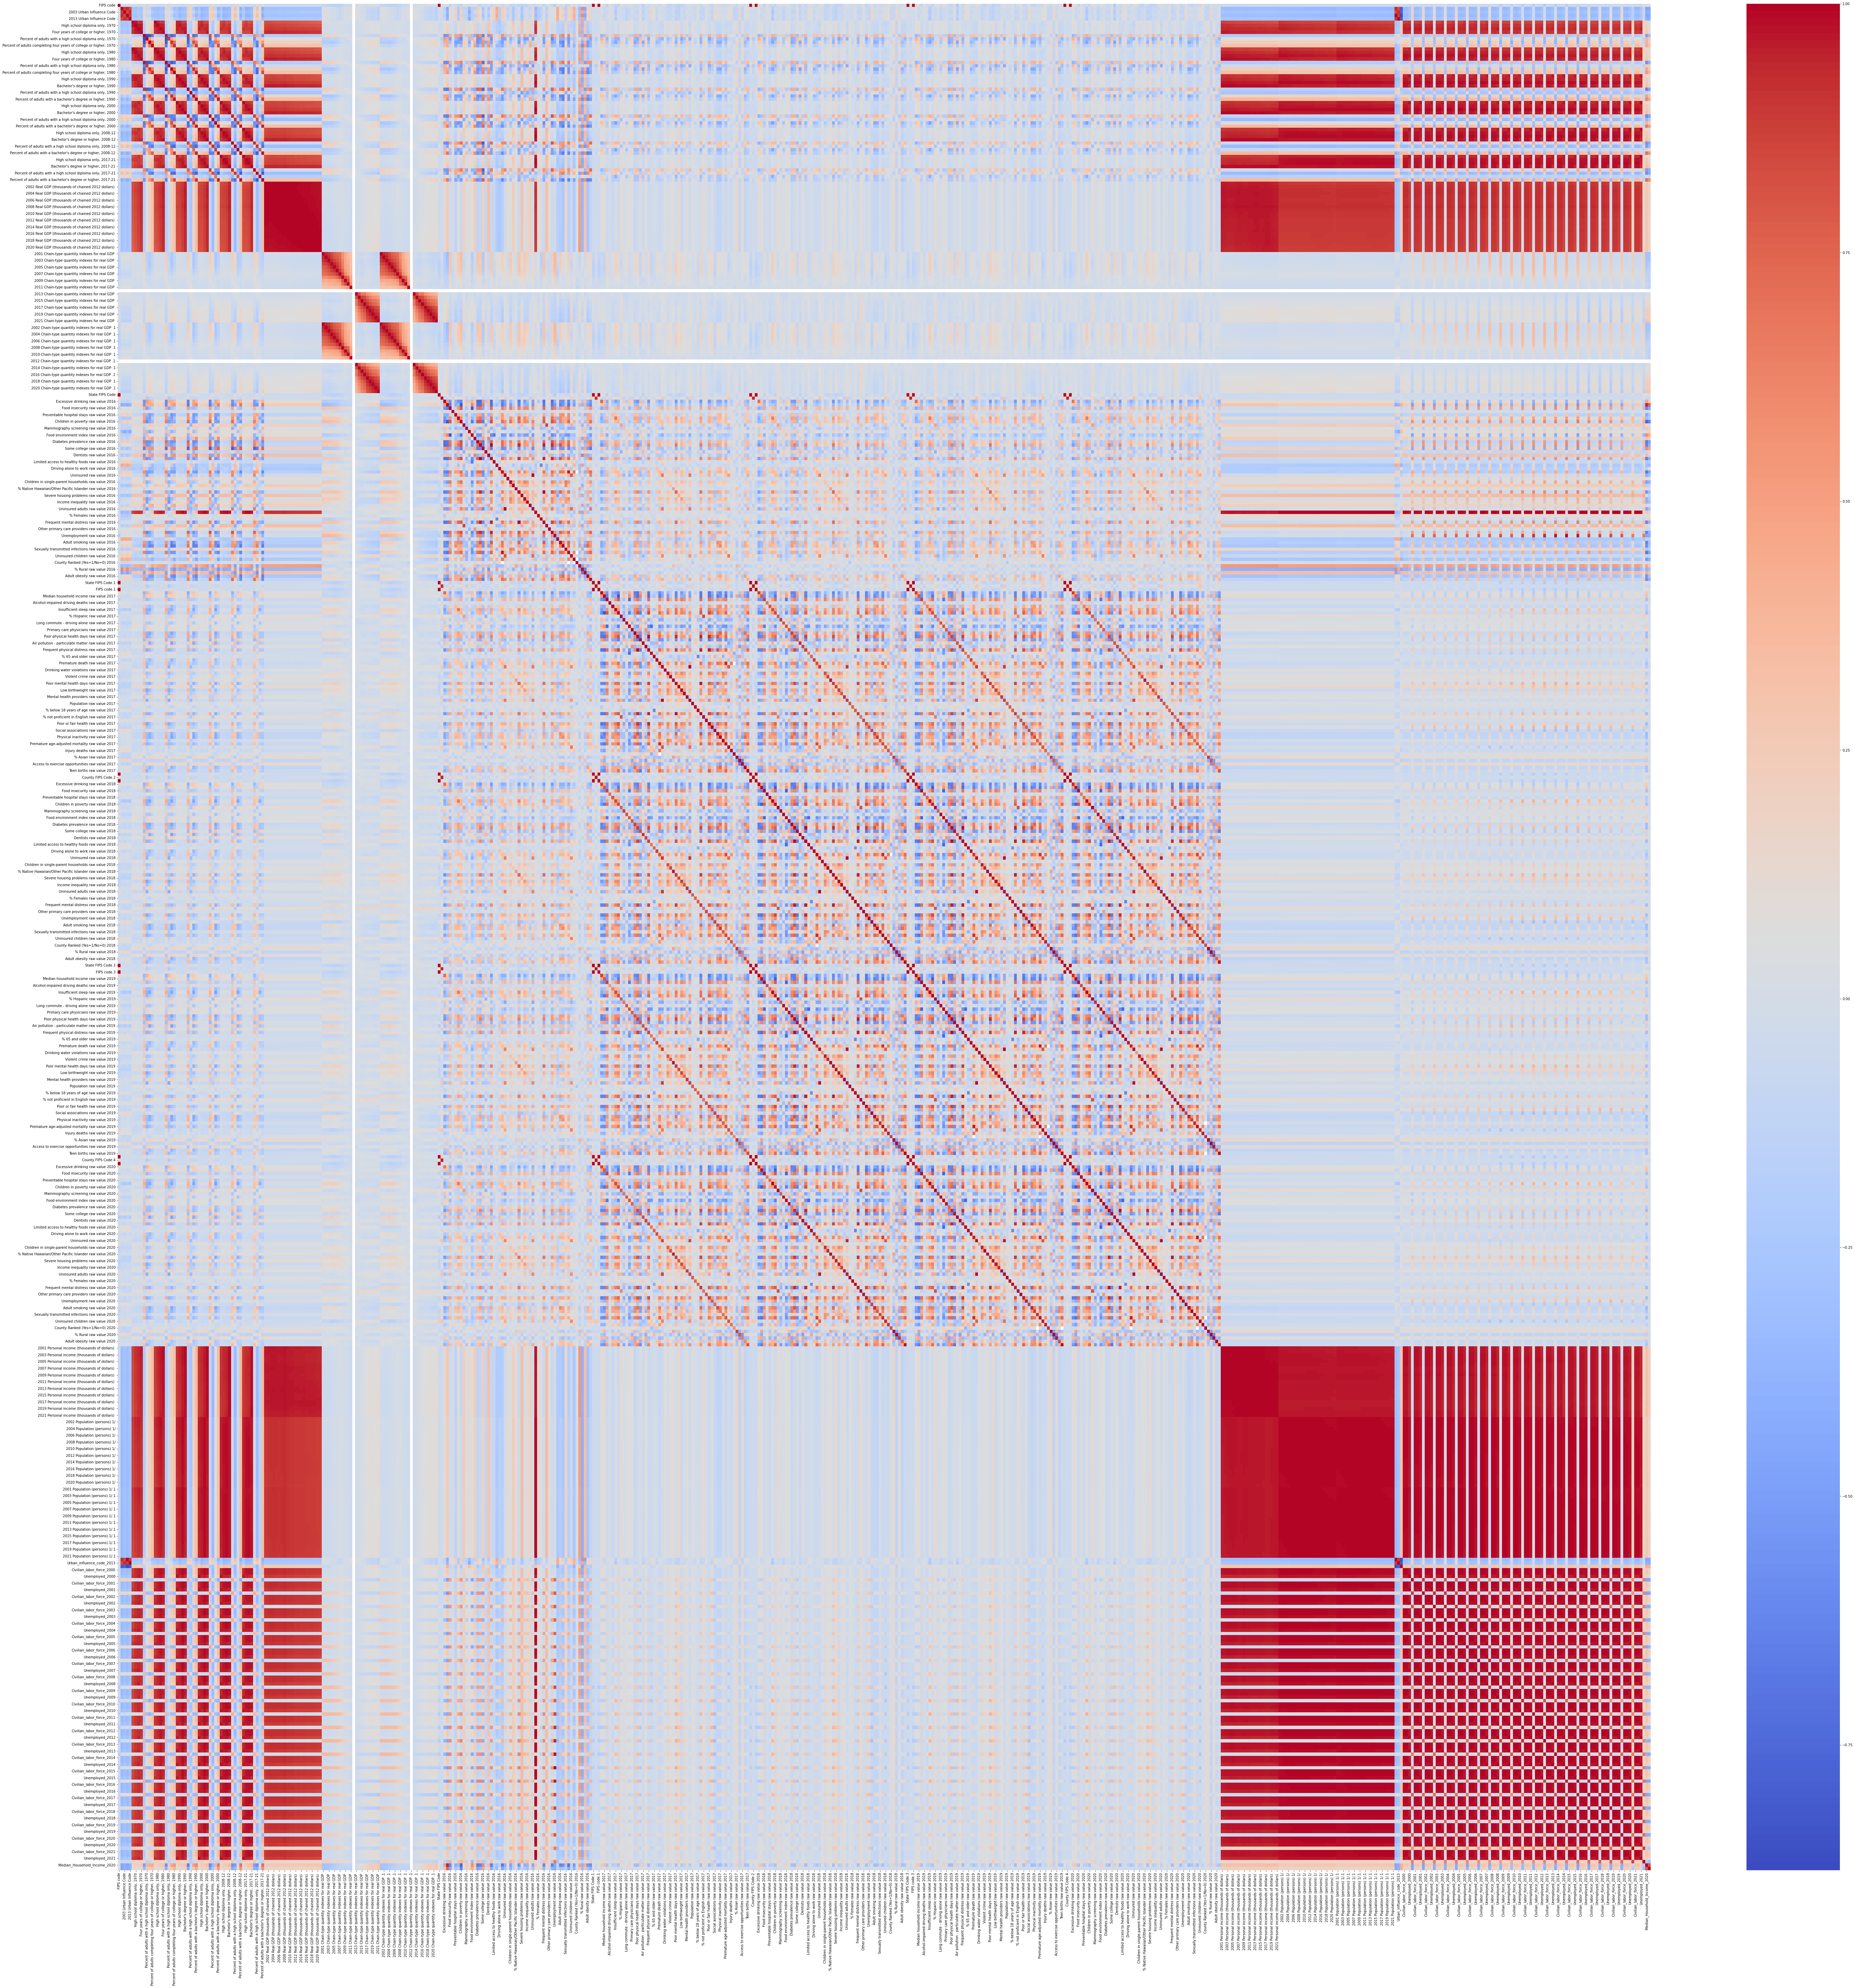

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(100, 100))
sns.heatmap(corr, cmap='coolwarm')
# plt.savefig('./dojebany_obrazek.png')
plt.show()

In [8]:
corr

,FIPS code,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970",...,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
FIPS code,1.000000,-0.017037,-0.031222,-0.020461,-0.032037,-0.014749,-0.028121,-0.044068,-0.032903,0.007858,...,-0.044213,-0.043666,-0.047669,0.026027,-0.043795,-0.043624,-0.044111,0.057201,0.060939,0.028854
2003 Rural-urban Continuum Code,-0.017037,1.000000,0.886887,0.927145,0.832788,-0.283479,-0.289118,-0.248834,-0.277003,0.180101,...,-0.348897,-0.354378,-0.289682,-0.184351,-0.348729,-0.353143,-0.275137,-0.086407,-0.454787,-0.440484
2003 Urban Influence Code,-0.031222,0.886887,1.000000,0.848491,0.922632,-0.241542,-0.245087,-0.209805,-0.234148,0.087441,...,-0.298035,-0.302826,-0.246487,-0.164800,-0.297951,-0.301796,-0.234093,-0.065722,-0.400855,-0.399075
2013 Rural-urban Continuum Code,-0.020461,0.927145,0.848491,1.000000,0.887960,-0.275214,-0.279451,-0.240914,-0.268142,0.167986,...,-0.340316,-0.345744,-0.281828,-0.176432,-0.340218,-0.344587,-0.267599,-0.075079,-0.454360,-0.435422
2013 Urban Influence Code,-0.032037,0.832788,0.922632,0.887960,1.000000,-0.232303,-0.234751,-0.200886,-0.224167,0.078990,...,-0.286875,-0.291552,-0.236679,-0.163286,-0.286794,-0.290554,-0.224562,-0.056113,-0.394905,-0.386439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Employed_2021,-0.043624,-0.353143,-0.301796,-0.344587,-0.290554,0.827566,0.879445,0.904642,0.889444,-0.223013,...,0.999529,0.999865,0.965480,0.193093,0.999768,1.000000,0.952497,0.146070,0.307976,0.213463
Unemployed_2021,-0.044111,-0.275137,-0.234093,-0.267599,-0.224562,0.869794,0.910358,0.942208,0.896562,-0.162802,...,0.960284,0.953070,0.994079,0.227342,0.958838,0.952497,1.000000,0.207896,0.217080,0.120328
Unemployment_rate_2021,0.057201,-0.086407,-0.065722,-0.075079,-0.056113,0.215147,0.184829,0.150673,0.153985,0.131554,...,0.152982,0.147658,0.195210,0.866673,0.150901,0.146070,0.207896,1.000000,-0.212114,-0.310213
Median_Household_Income_2020,0.060939,-0.454787,-0.400855,-0.454360,-0.394905,0.157960,0.220826,0.215742,0.259937,-0.498247,...,0.303252,0.310288,0.231734,-0.133160,0.302509,0.307976,0.217080,-0.212114,1.000000,0.805417
